Logs
- [2025/09/03]   
  We enumerate all the possible combinations or permutations for some problems
  in (Rosen, 2019) - Chapter 6


In [14]:
import numpy as np
import scipy.special as sc_special
import matplotlib.pyplot as plt

from fractions import Fraction
from itertools import combinations_with_replacement

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  "font.size": 16,
  "grid.alpha": 0.25})

**Example 10**

In [3]:
def distribute_games(total_games, num_days):
  if total_games < num_days:
    print("Not enough games to assign at least one per day.")
    return []

  # We assign 1 game to each day first
  base_games = [1] * num_days
  remaining = total_games - num_days    

  distributions = []

  # Generate all ways to distribute 'remaining' identical games into 'num_days" days
  # This is equivalent to finding multisets of size 'remaining' from 7 days
  # Each multiset corresponds to which days get extra games

  # We use combinatoins_with_replacement on indices (0 to 6) to represent which day gets an extra game
  # Each combination represent the days that get +1 game (with repetition allowed)

  # Example: (0, 0) -> day 0 gets 2 extra games
  #          (0, 1) -> day 0 and 1 get 1 extra each

  for combo in combinations_with_replacement(range(num_days), remaining):
    dist = base_games[:]      # copy base: one game per day
    for day_index in combo:
      dist[day_index] += 1
    
    distributions.append(dist)

  return distributions



In [5]:
# -- small example
# total_games = 9  
# num_days = 7

# -- examples based on the problem
total_games = 32   # increase this
num_days = 30

distributions = distribute_games(total_games, num_days)

print(f"Total number of valid distributions: {len(distributions)}\n")
for i, dist in enumerate(distributions, 1):
  print(f"{i:2d}: {dist} (sum = {sum(dist)})")

Total number of valid distributions: 465

 1: [3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] (sum = 32)
 2: [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] (sum = 32)
 3: [2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] (sum = 32)
 4: [2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] (sum = 32)
 5: [2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] (sum = 32)
 6: [2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] (sum = 32)
 7: [2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] (sum = 32)
 8: [2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] (sum = 32)
 9: [2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] (sum = 32)
10: 

If we decide to find the consecutive days where the team must play exactly 4 games, 
we can see there is a way to find that in each combination

*Solution*: Let $a_j$ be the number of games played on or before the $j$-th day of the week. 
Then $a_1, a_2, \ldots, a_7$ is an increasing sequence of distinct positive integers, 
with $1 \leq a_j \leq 9$. Moreover, $a_1 + 4, a_2 + 4, \ldots, a_7 + 4$ is also 
an increasing sequence of distinct positive integers, with $5 \leq a_j + 4 \leq 13$.

The 14 positive integers $a_1, a_2, \ldots, a_7, a_1 + 5, a_2 + 5, \ldots, a_7 + 5$ 
are all less than or equal to 13. Hence, by the pigeonhole principle two of 
these integers are equal (two integers each from those positive integer sets). 
Because the integer $a_j, j=1, 2, \ldots, 7$ are all distinct and the integers
$a_j + 4, j = 1, 2, \ldots, 7$ are all distinct, there must be indices $i$ 
and $j$ with $a_i = a+j + 4$. This means that exactly 4 games were played
from day $j+1$ to day $i$.

$$
\binom{n + r - 1}{r} 
$$

$$
\text{2 remaining games}= \frac{(30 + 2 - 1)!}{2!(30-1)!} 
  = \frac{31 \cdot 30 \cdot 29! }{2! \cdot 29!} 
  = 31 \cdot 15
  = 465
$$

$$
\text{3 remaining games}= \frac{(30 + 3 - 1)!}{3!(30-1)!} 
  = \frac{32 \cdot 31 \cdot \cdot 30 \cdot 29! }{3! \cdot 29!} 
  = 32 \cdot 31 \cdot 5
  = 4960
$$

$$
\text{15 remaining games} = \frac{(30 + 15 - 1)!}{15! (30-1)!}
  = \frac{45 \cdots 30 \cdot 29!}{15! \cdot 29!}
  = \frac{45 \cdots 30}{15!}
$$

In [6]:
def num_of_game_distribution(total_games, num_days):
  return sc_special.factorial(total_games - 1) \
    / (sc_special.factorial(total_games - num_days) * sc_special.factorial(num_days-1))

In [7]:
remaining_games = np.arange(1, 16)
num_days = 30

total_combination = np.round([num_of_game_distribution(games + num_days, num_days) for games in remaining_games])
total_combination.astype(np.int64)

array([          30,          465,         4960,        40920,
             278256,      1623160,      8347680,     38608020,
          163011640,    635745396,   2311801440,   7898654920,
        25518731280,  78378960360, 229911617056], dtype=int64)

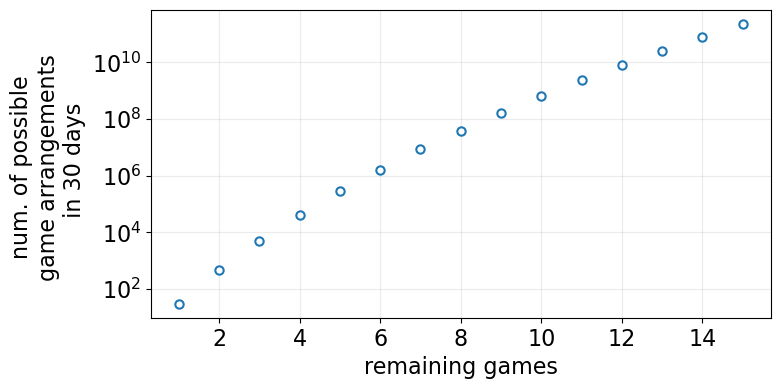

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(remaining_games, total_combination, linestyle="None", marker="o", 
  markerfacecolor="white", markeredgewidth=1.5)
ax.set_yscale("log")
ax.grid("on")
ax.set_xlabel("remaining games")
ax.set_ylabel("num. of possible \ngame arrangements \n in 30 days")


plt.show(fig)

distinguishable objects and distinguishable boxes

In [17]:
a = Fraction(sc_special.factorial(52, exact=True),
  sc_special.factorial(5, exact=True)**4 
  * sc_special.factorial(32, exact=True))

display(a)
print(f"{a.numerator:,}")

Fraction(1478262843475644020034240, 1)

1,478,262,843,475,644,020,034,240
